In [1]:
import json
import sys
import os
import pandas as pd

# parent_dir = os.path.abspath(os.getcwd())
# vendor_dir = os.path.join(parent_dir, 'vendor')
# sys.path.append(vendor_dir)

# from tripadvisorCrawler.items import ReviewItem

from items import *
from dataframe import *
from chronos import *

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np

import calendar
from ggplot import *

In [2]:
# data open and auto parse

with open('data/review_items.jl', 'r') as f:
    raw = f.read()

reviews = as_dataframe(raw)

with open('data/hotel_items.jl','r') as f:
    raw = f.read()

hotels = as_dataframe(raw)

In [3]:
## show case hotels
hotels.head(3)

,batch_id,description,item_id,item_title,site_name,url
0,20160920153033,"The Merrion Hotel, Dublin: See 2,572 traveller...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nThe Merrion Hotel\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...
1,20160920153033,"Aberdeen Lodge, Dublin: See 448 traveller revi...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nAberdeen Lodge\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...
2,20160920153033,"Ariel House, Dublin: See 1,231 traveller revie...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nAriel House\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...


In [4]:
# number of hotels
hotels.shape[0]

157

In [5]:
# show case reviews
reviews.head(3)

,batch_id,item_id,rating,rating_percentage,review_id,review_text,review_title,site_name,timestamp_rating,url,user_id
0,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,5,1.00,review_419380945,\nWe were there for a very short time only but...,“Was fab!”,TripAdvisor,2016-09-17,https://www.tripadvisor.ie//ShowUserReviews-g1...,70C106C794E866B6CC8EB2CEAB5065AE
1,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,5,1.00,review_418509752,"\ngo early enjoy every minute, you will not re...",“wonderful”,TripAdvisor,2016-09-14,https://www.tripadvisor.ie//ShowUserReviews-g1...,70A6646B5249D0F77159284DF06BC0FF
2,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,4,0.75,review_418590298,\nCool place. Neat mix of old castle and moder...,“good.”,TripAdvisor,2016-09-14,https://www.tripadvisor.ie//ShowUserReviews-g1...,54208AF58C1AF1669E07392020DE0545


In [6]:
#summary of rating of dublin hotels
reviews.ix[:,['rating']].describe()

,rating
count,132496.000000
mean,4.102290
std,1.073778
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
reviews['timestamp_rating'].describe()

count                  132496
unique                   4272
top       2015-05-26 00:00:00
freq                      227
first     2001-11-28 00:00:00
last      2016-09-19 00:00:00
Name: timestamp_rating, dtype: object

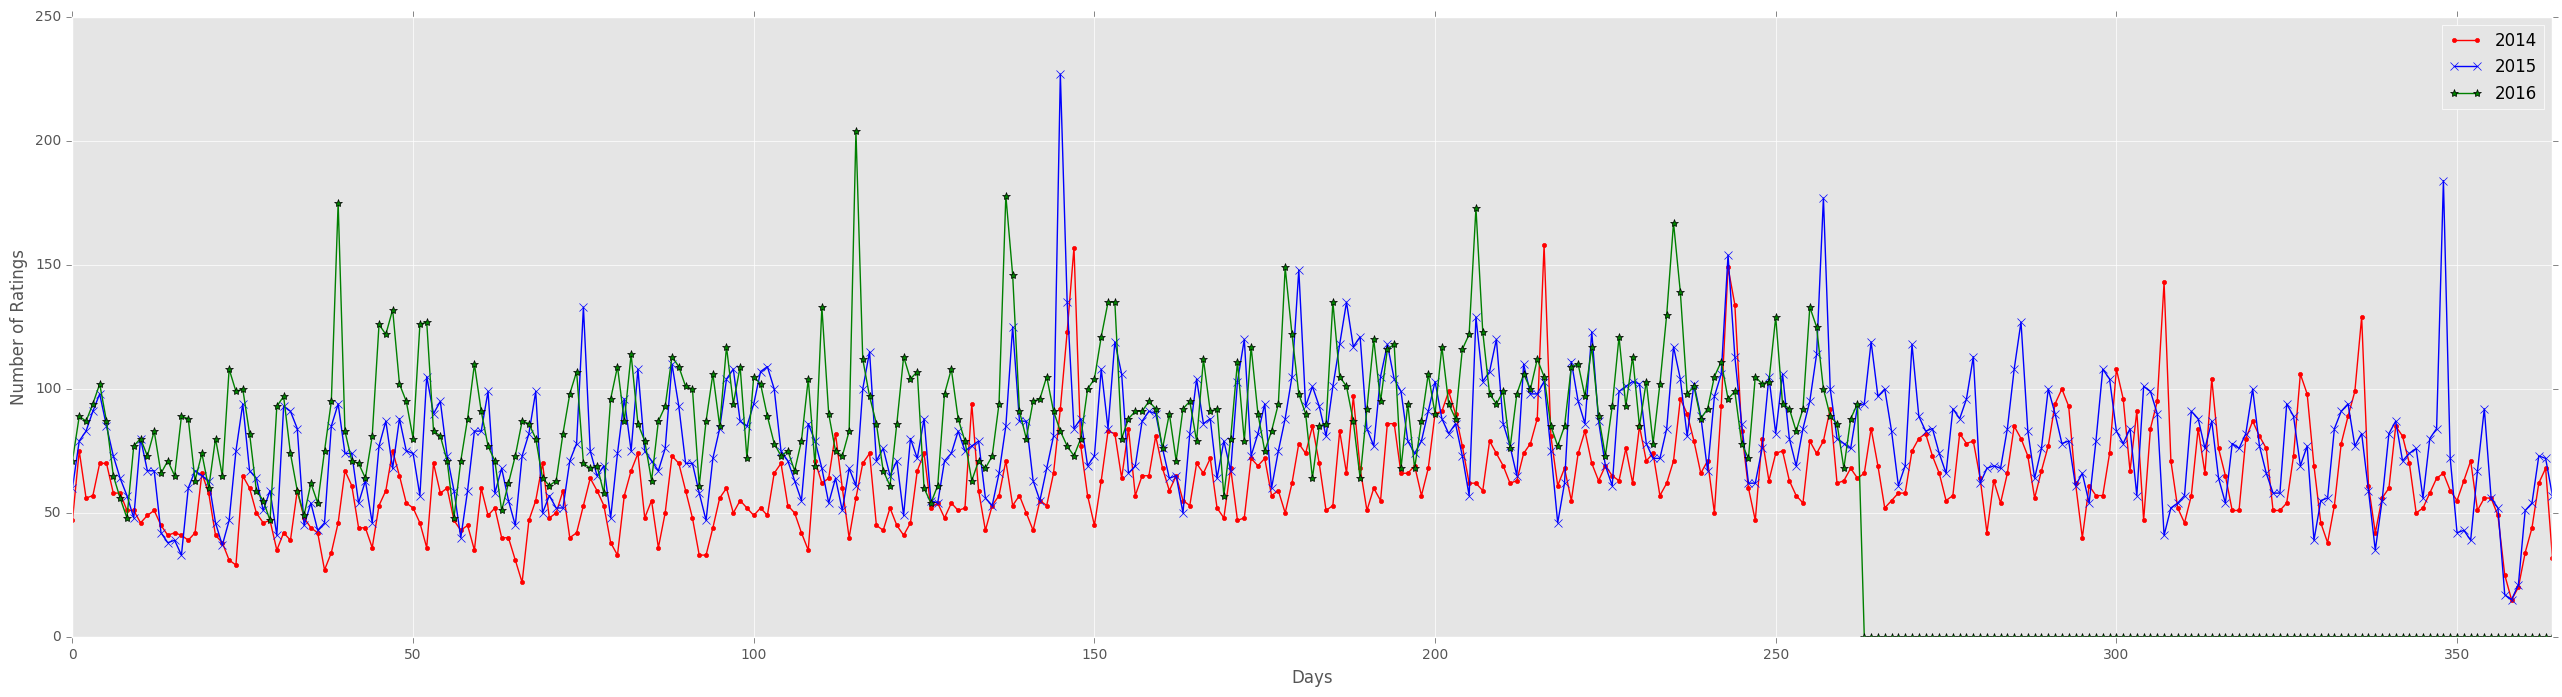

In [8]:
# reviews['rating_date'] = pd.to_datetime(reviews['rating_date'], format='%Y-%m-%dT%H:%M:%S')
# timeseries = reviews.set_index('rating_date')
timeseries = reviews.set_index('timestamp_rating')

ts2014 = timeseries['2014-01-01':'2014-12-31'].ix[:,'rating'].resample('D').count() #changed to D from M
ts2015 = timeseries['2015-01-01':'2015-12-31'].ix[:,'rating'].resample('D').count()
ts2016 = timeseries['2016-01-01':'2016-12-31'].ix[:,'rating'].resample('D').count()

# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# month_factor = calendar.month_abbr[1:13]
day_factor = range(1,366)
year_factor = ['2014','2015','2016']

xlabel = 'Day' # changed to day
ylabel = 'Ratings'


# df4 = pd.DataFrame({xlabel:ts2014.index, ylabel:ts2014.values})
df4 = pd.DataFrame({ylabel:ts2014.values})
df5 = pd.DataFrame({ylabel:ts2015.values})

pad_x3_index = pd.date_range('1/1/2016',periods=365,freq='D') # changed to D
# print(pad_x3_index)
ts2016=ts2016.reindex(pad_x3_index).fillna(0)

df6 = pd.DataFrame({ylabel:ts2016.values})

# new timestamp series
# newts = pd.concat([df1,df2,df3])
# newts.set_index(xlabel,inplace=True)

# http://stackoverflow.com/questions/37596714/compare-multiple-year-data-on-a-single-plot-python
ax4 = df4.plot(y=ylabel, figsize=(32,8), color='r', style='.-')
# independent = ax4.twinx()
ax5 = df5.plot(ax=ax4, color ='b', style='-x')
finalPlot = df6.plot(ax=ax5, color = 'g', style='-*')
finalPlot.legend(['2014','2015','2016'],loc='best')
finalPlot.set_ylabel('Number of Ratings')
finalPlot.set_xlabel('Days')

# http://blog.yhat.com/posts/aggregating-and-plotting-time-series-in-python.html
# custom all...


# months_f = pd.Series(np.tile(month_factor,3)).astype('category')
# years_f = pd.Series(np.repeat(year_factor,12)).astype('category')

# # 我快吐血了， 为了这个自定义的plot
# custom = pd.DataFrame({
#         'Month':months_f,
#         'Ratings':np.array([ts2014.values,ts2015.values,ts2016.values]).flatten(),
#         'Year':years_f
#     })

# ggplot(aes(x = 'Month', y = 'Ratings'), custom) + geom_line()
# ggplot(aes(x='Month',y='Ratings',colour='Year'),custom) + geom_line()


In [9]:
reviewByHotels = reviews.groupby('item_id')

In [10]:
dct = {}
for hotel_url, group in reviewByHotels:
    subset = group.ix[:,['timestamp_rating', 'rating', 'review_text', 'review_title','url']].set_index('timestamp_rating')
    summary = subset.ix[:,'rating'].describe()
    dct[hotel_url] = summary.get_value('count')
    
heap = [(value,key) for key,value in dct.items()]
import heapq
n = 10
topHotels = heapq.nlargest(n, heap)
topHotels = [(key,value) for value,key in topHotels]
print('Top 10 reviewed hotels\n')
print([get_hoteldesc(item[0], hotels)+":"+str(item[1]) for item in topHotels])

#     print(summary, hotel_url)

#     subset['rating_date'] = pd.to_datetime(subset['rating_date'], format='%Y-%m-%dT%H:%M:%S')

    ## Do my own thing: input is subset of rating with timestamp index. output is bin
    ## count for last 2 years of rating on a weekly span.

#     print(subset.resample('AS').count()) # annual start
#     last2years = pd.date_range('2014-01-01','2016-09-01')
#     last2years = pd.period_range('2014','2016')
#     print(last2years)
#     weeklyCount = subset['2014-01-01':'2016-09-01'].resample('AS').count()

#     print(weeklyCount)
#     print(subset["2014-01-01":"2016-09-01"])


Top 10 reviewed hotels

[u'The Gibson Hotel:3709.0', u'The Croke Park:3596.0', u'Gresham Hotel:3380.0', u'Ashling Hotel:3374.0', u'The Westbury:3160.0', u'Clayton Hotel Cardiff Lane:3078.0', u'BEST WESTERN PLUS Academy Plaza Hotel:3045.0', u'Clontarf Castle Hotel:3006.0', u'The Shelbourne Dublin, A Renaissance Hotel:2998.0', u'The Merrion Hotel:2542.0']


In [11]:
# testUrl = 'https://www.tripadvisor.ie/Hotel_Review-g186605-d1765611-Reviews-The_Gibson_Hotel-Dublin_County_Dublin.html'
testUrl = 'https://www.tripadvisor.ie/Hotel_Review-g186605-d559524-Reviews-The_Croke_Park-Dublin_County_Dublin.html'
des = get_hoteldesc(testUrl, hotels)


print(des)

The Croke Park


In [12]:
testRevs = reviews[reviews.item_id == testUrl].set_index('timestamp_rating')

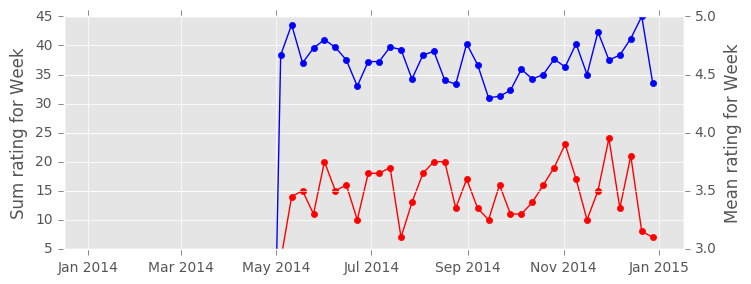

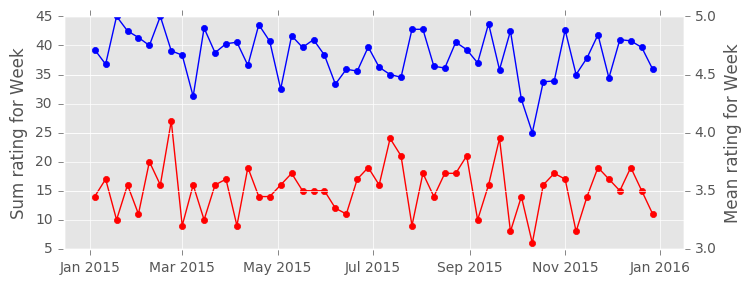

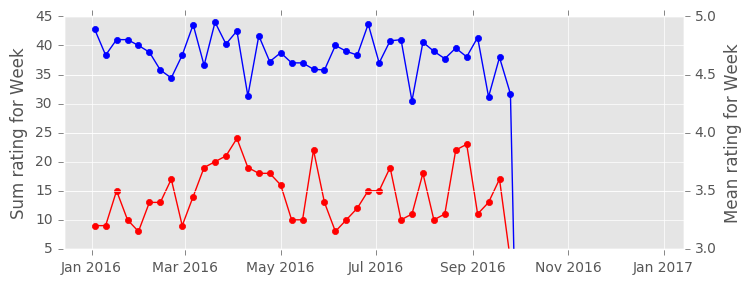

In [13]:

## hotel id, freq, start, end; data=groupedReviews
## divide by start to end, yearly
## depending on freq, get x length (pad)
## resample with freq, pad them each
## get values for each
## plot x,values for each

start = '2014-05'
end = '2016-09'

freq = 'W'


testRevsMean = testRevs.ix[:,'rating'][start:end].resample(freq).mean()#.fillna(0)
testRevsCount = testRevs.ix[:,'rating'][start:end].resample(freq).count()#.fillna(0)

# print(testRevsMean)
# print(testRevsCount)


meanDFs = [group[1] for group in testRevsMean.groupby(testRevsMean.index.year)]
countDFs = [group[1] for group in testRevsCount.groupby(testRevsCount.index.year)]

years = get_yearsfromrange(start,end)

xlabel = 'Weeks' if freq is 'W' else 'Months'
interval = 'Week' if freq is 'W' else 'Month'
        
ylabels = [s+interval for s in ['Mean rating for ', 'Sum rating for ']]

for i in range(len(meanDFs)):
    padded_year_freq = get_paddedyearbyfreq(years[i], freq)
    freq_factor = get_freqfactor(freq)
    meanDFs[i] = meanDFs[i].reindex(padded_year_freq).fillna(0)
    countDFs[i] = countDFs[i].reindex(padded_year_freq).fillna(0)
    
    x1 = countDFs[i].index
    y1 = countDFs[i].values
    x2 = meanDFs[i].index
    y2 = meanDFs[i].values

    fig, ax1 = plt.subplots(figsize=(8, 3))
    ax1.plot(x1,y1,color='r')
    ax1.scatter(x1,y1,color='r')
    ax1.set_ylim(5,45)
    ax1.set_ylabel(ylabels[1])

    ax2 = ax1.twinx()

    ax2.plot(x2,y2, 'b')
    ax2.scatter(x2,y2, color='b')
    ax2.set_ylim(3,5)
    ax2.set_ylabel(ylabels[0])



In [14]:
# newts['Month'] = map(lambda x: cal.month_abbr[x.month], newts.index)
# newts['Year'] = map(lambda x: str(x.year), newts.index)
# newts['Year'] = newts['Year'].astype('category')

# print('before melt: ')
# print(newts.head(6))

# newts.plot()

# df4 = pd.melt(nots, id_vars=['Month','Year'],value_vars=['rating_count'])

# print("melted: ")
# print(type(df4))
# print(df4.head(3))

# from ggplot import ggplot, ggtitle, geom_line, aes
# p1 = ggplot(aes(x=xlabel, y=ylabel), df1) + geom_line()
# p2 = ggplot(aes(x=xlabel, y=ylabel), df2) + geom_line()
# p3 = ggplot(aes(x=xlabel, y=ylabel), df3) + geom_line()

# p1.show()
# p2.show()
# p3.show()

# ggplot(aes(x='Month', y='rating_count',colour='Year'),nots)+geom_line() + ggtitle("Monthly Rating Count for last 2 years")

# fig, axs = plt.subplots(1,2,figsize=(15,5))
# df1 = countDFs[0].ix[:,'rating']
# df2 = meanDFs[0].ix[:,'rating']
# df2 = df2.reindex(df1.index)
# ax = df1.plot(ax=axs[0])

# df2.plot(ax=ax)
# fig, axs = plt.subplots(1,2,figsize=(15,5))
# fig, axs = plt.subplots(1,2,figsize=(15,5))